## Data Preprocessing

In [5]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as st


###Import Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path="/content/drive/MyDrive/Machine Learning/CH-512/Project/Table - IN_Table.csv"
data= pd.read_csv(path)
data.describe()

IN1           IN2           IN3           IN4           IN5  \
count  1.440100e+04  1.440100e+04  1.440100e+04  1.440100e+04  1.440100e+04   
mean  -3.911535e-12 -1.658765e-12 -2.405762e-12  2.957421e-12  1.521103e-12   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.696646e+00 -3.437986e+00 -2.639204e+00 -2.354538e+00 -1.934470e+00   
25%   -3.385843e-01 -9.371822e-01 -3.013195e-01 -8.791605e-01 -7.130980e-01   
50%    3.617588e-01  5.709954e-01  2.248603e-01  5.034075e-01 -4.158845e-02   
75%    6.842442e-01  7.610581e-01  4.011428e-01  8.862316e-01  5.721888e-01   
max    1.590639e+00  1.939639e+00  1.844610e+00  1.654608e+00  3.615581e+00   

               Out1          Out2  
count  1.440100e+04  1.440100e+04  
mean   3.521351e-11  8.724543e-13  
std    1.000000e+00  1.000000e+00  
min   -5.201644e+00 -5.989071e+00  
25%   -5.060039e-01 -5.130819e-01  
50%    1.648018e-01 -3.687546e-03  
75%    6.439487e-01  5.057068e-01  
max    1.396423e+01  7.637227e+00

In [8]:
data.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.500407  0.924350  0.438273  0.455514  0.624829  0.381853
IN2   0.500407  1.000000  0.321950  0.895081  0.081605  0.388346  0.201564
IN3   0.924350  0.321950  1.000000  0.197927  0.365890  0.572199  0.415136
IN4   0.438273  0.895081  0.197927  1.000000  0.013679  0.301107  0.203665
IN5   0.455514  0.081605  0.365890  0.013679  1.000000  0.428711  0.101761
Out1  0.624829  0.388346  0.572199  0.301107  0.428711  1.000000 -0.151741
Out2  0.381853  0.201564  0.415136  0.203665  0.101761 -0.151741  1.000000

###Removing the outliers


In [9]:
#the median method gave higher accuracy than the mean.
def outlier(data):
    for column in data.columns:
        data[column] = data[column].astype(float)
        mean = st.median(data[column])
        std_dev = np.std(data[column])
        lower_bound = mean - 3.21 * std_dev
        upper_bound = mean + 3.21 * std_dev
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data
data_c = outlier(data)
data_c.describe()

IN1           IN2           IN3           IN4           IN5  \
count  14176.000000  14176.000000  14176.000000  14176.000000  14176.000000   
mean       0.009382      0.014270      0.006200      0.015347     -0.000104   
std        0.992595      0.994712      0.991941      0.995247      0.990093   
min       -2.696646     -2.534229     -2.631096     -2.354538     -1.934470   
25%       -0.296903     -0.921675     -0.295194     -0.878523     -0.709896   
50%        0.365294      0.607283      0.225387      0.512090     -0.040223   
75%        0.683844      0.762325      0.400967      0.887047      0.572440   
max        1.590639      1.939639      1.844610      1.654608      3.161070   

               Out1          Out2  
count  14176.000000  14176.000000  
mean      -0.000980     -0.007083  
std        0.934781      0.906343  
min       -2.997568     -3.060053  
25%       -0.506004     -0.513082  
50%        0.164802     -0.003688  
75%        0.643949      0.505707  
max        3.327171      3.052678

###Plotting The Graphs

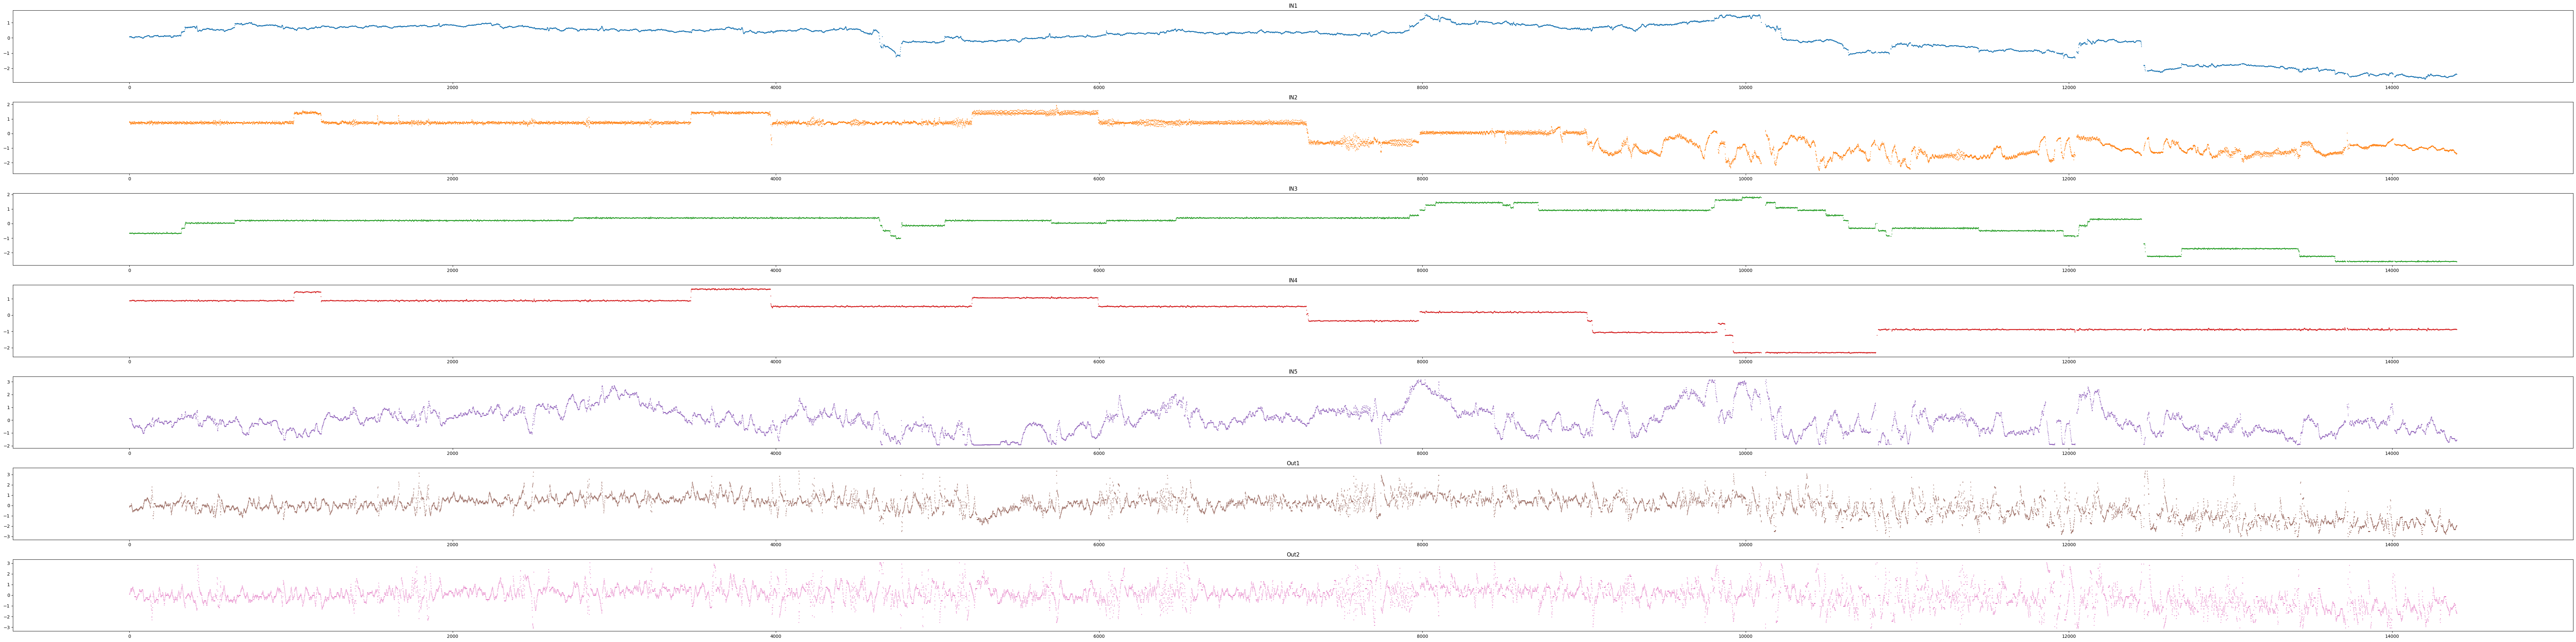

In [10]:
plt.figure(figsize=(80, 20))

for i, col in enumerate(data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data_c.index, data_c[col], marker='.', color='C{}'.format(i-1),s=2)
    plt.title(col)

plt.tight_layout()

plt.show()

In [11]:
data_c.corr()

IN1       IN2       IN3       IN4       IN5      Out1      Out2
IN1   1.000000  0.506149  0.923903  0.443309  0.456284  0.671510  0.434053
IN2   0.506149  1.000000  0.328303  0.896780  0.075256  0.408026  0.244803
IN3   0.923903  0.328303  1.000000  0.202082  0.368440  0.624368  0.455896
IN4   0.443309  0.896780  0.202082  1.000000  0.014609  0.326593  0.234142
IN5   0.456284  0.075256  0.368440  0.014609  1.000000  0.447622  0.138358
Out1  0.671510  0.408026  0.624368  0.326593  0.447622  1.000000 -0.025025
Out2  0.434053  0.244803  0.455896  0.234142  0.138358 -0.025025  1.000000

### Error Details

In [12]:
def results(Y_pred,Y_test,M):
  from sklearn.metrics import mean_squared_error,r2_score

  SSE= mean_squared_error(Y_pred,Y_test)
  MSE= np.mean((y1_test - y1_pred) **2)
  n=len(Y_test)

  AIC = M*2         +n*(np.log(SSE/n))
  BIC = M*np.log(n) +n*(np.log(SSE/n))


  print('R2  : ', r2_score(Y_pred,Y_test))
  print('SSE : ', SSE )
  print('MSE : ', MSE )

  print('aic : ', AIC)
  print('bic : ', BIC)

# Plot

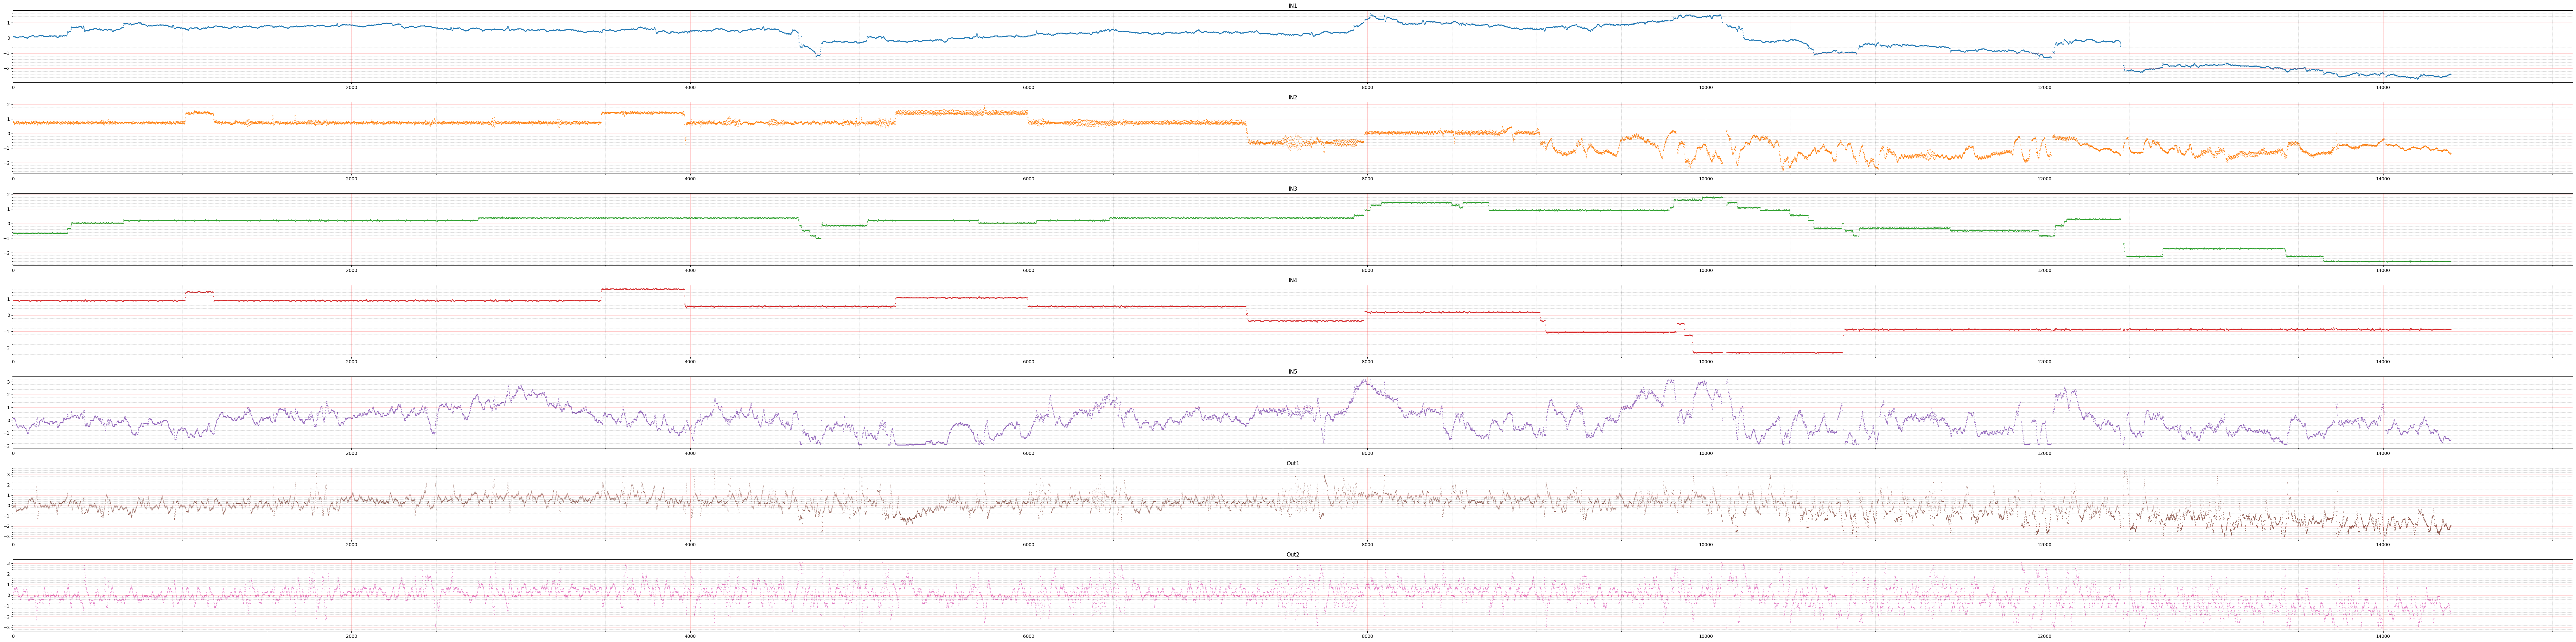

In [13]:
plt.figure(figsize=(80, 20))

for i, col in enumerate(data_c.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(data_c.index, data_c[col], marker='.', color='C{}'.format(i-1), s=2)
    plt.title(col)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.3)
    plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(left=0)

plt.tight_layout()
plt.show()


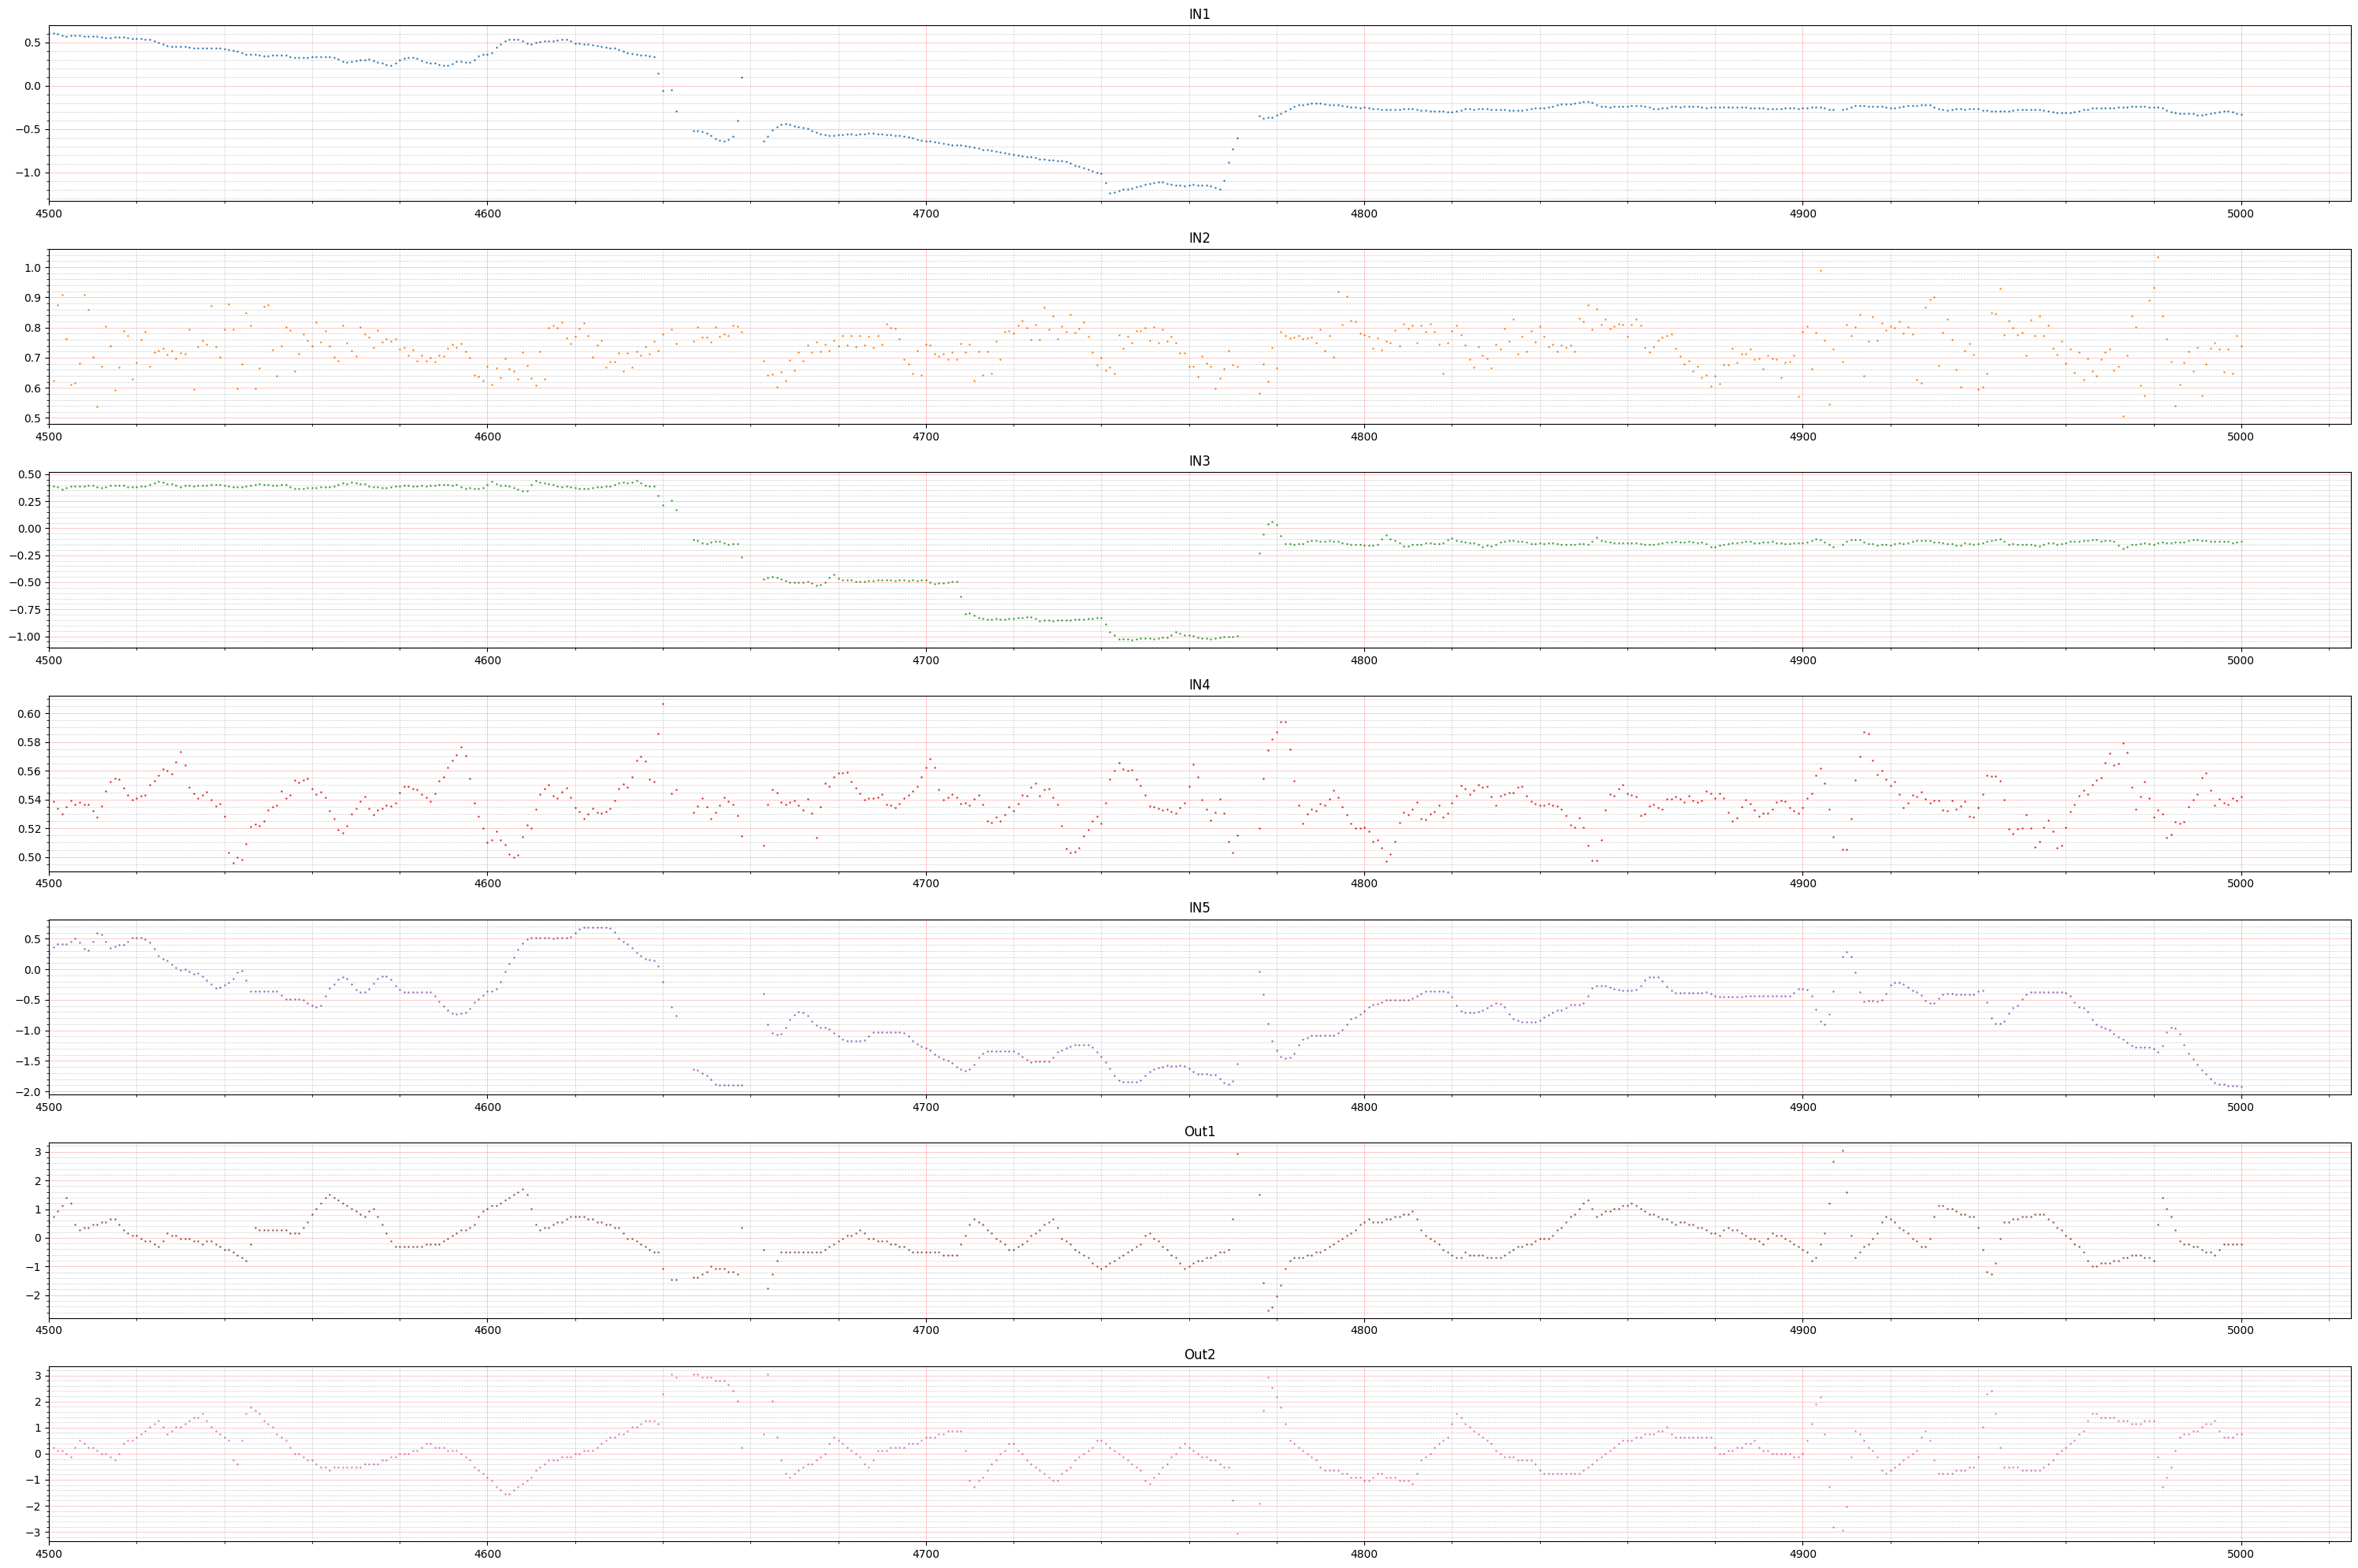

In [14]:
illust_data = data_c[(data_c.index >= 4500) & (data_c.index <= 5000)]
plt.figure(figsize=(30, 20))

for i, col in enumerate(illust_data.columns, start=1):
    plt.subplot(7, 1, i)
    plt.scatter(illust_data.index, illust_data[col], marker='.', color='C{}'.format(i-1), s=2)
    plt.title(col)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red', alpha=0.3)
    plt.grid(which='minor', linestyle='--', linewidth='0.5', color='black', alpha=0.2)
    plt.minorticks_on()
    plt.xlim(left=4500)


plt.tight_layout()
plt.show()


# Error And Plot

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import pi, log

def result(y_test, y_pred, k):
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    SSE = mean_squared_error(y_test, y_pred) * n
    MAE = mean_absolute_error(y_test, y_pred)
    aic = 2 * k + n * log(2 * pi) + n * log(SSE / n) + n
    bic = k * log(n) + n * log(2 * pi) + n * log(SSE / n) + n

    # Print metrics
    print('R2 Score:', r2)
    print('SSE:', SSE)
    print('MAE:', MAE)
    print('AIC:', aic)
    print('BIC:', bic)

    # Plot actual vs predicted values
    plt.figure(figsize=(24, 6))
    start_index, end_index = 1000, 1300
    plt.plot(range(start_index, end_index), y_test[start_index:end_index], color='blue', label='Actual SO2', linewidth=1.5)
    plt.plot(range(start_index, end_index), y_pred[start_index:end_index], color='red', label='Predicted SO2', linewidth=1.5)

    # Add labels, title, and legend
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('SO2 Value', fontsize=12)
    plt.title(f'SO2 Actual vs Predicted (Indices {start_index}-{end_index})', fontsize=14)
    plt.legend(fontsize=12)

    # Add grids
    plt.grid(which='major', linestyle=':', linewidth=0.7, color='gray', alpha=0.8)
    plt.grid(which='minor', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.5)
    plt.minorticks_on()

    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

    # Add the R2 score
    plt.text(
        end_index - 50,
        max(y_test[start_index:end_index]),
        f"$R^2$ = {r2:.4f}",
        fontsize=12,
        color="black",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

    # Show the plot
    plt.tight_layout()
    plt.show()


# KNN

In [162]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out2']

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [170]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [171]:
y_pred_knn = knn.predict(X_test)

R2 Score: 0.4554212213502048
SSE: 1245.4757721033009
MAE: 0.42690512443203293
AIC: 5724.540172782049
BIC: 5754.290922220309


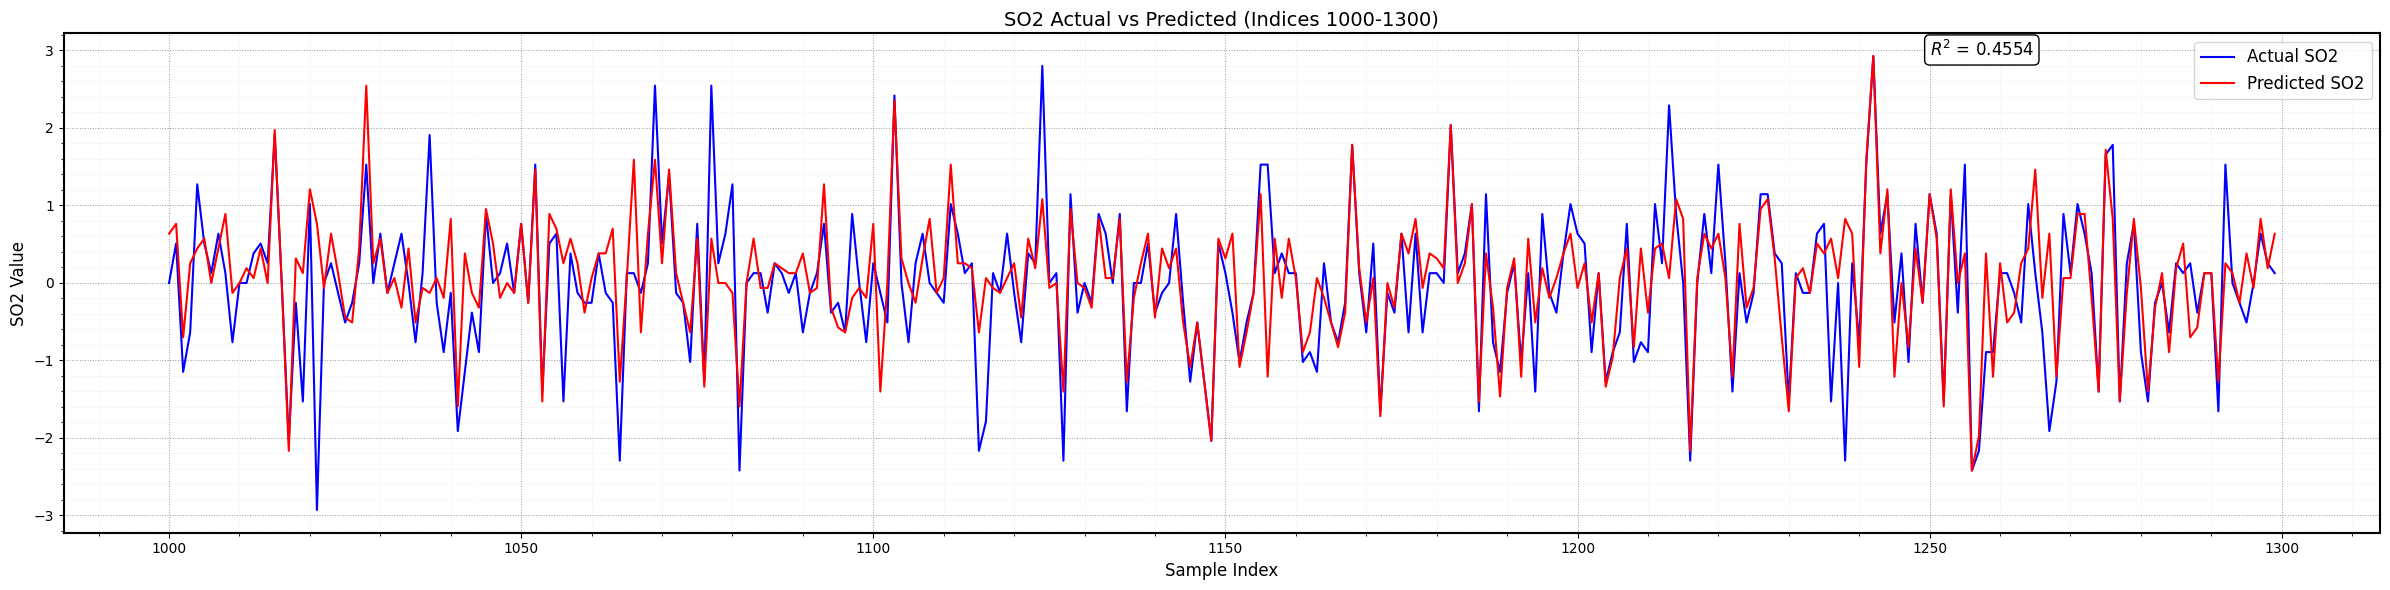

In [172]:
result(y_test,y_pred_knn,5)

# Polynomial Regression

In [135]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']

In [136]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.2,random_state=42)

In [138]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

LinearRegression()

In [139]:
y_pred_poly = poly_reg.predict(X_test)

R2 Score: 0.6819383140781694
SSE: 761.11253853877
MAE: 0.3844035302481517
AIC: 4327.833845451061
BIC: 4357.58459488932


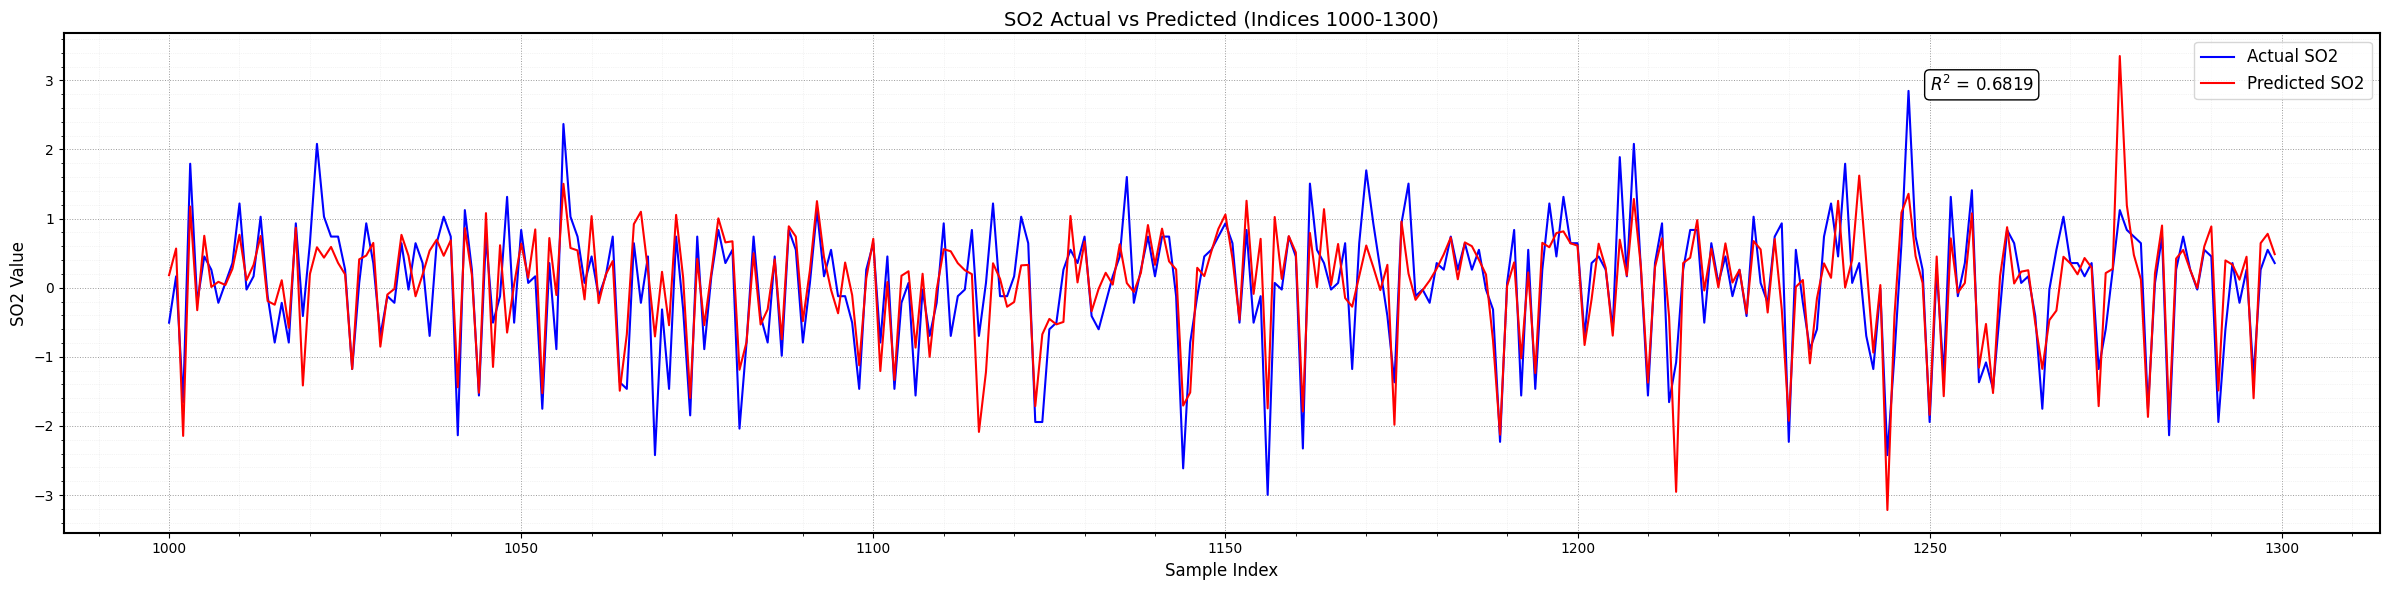

In [140]:
result(y_test,y_pred_poly,5)

# Linear Regression

In [ ]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_lin = lin_reg.predict(X_test)

In [ ]:
result(y_test,y_pred_lin,5)

R2_score : 0.5018031909037723
SSE : 0.4203705035788356
MAE : 0.47383113314315556
aic : -16946.136652572684
bic : -16916.385903134425


# Early Stopping Funtion

In [16]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    monitor="loss",
    min_delta = 0.0001,
    patience = 200,
    restore_best_weights = True,
)

In [17]:
import tensorflow as tf
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data
        self.r2_scores = []

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y = self.validation_data
        val_predictions = self.model.predict(val_x)
        r2 = r2_score(val_y, val_predictions)
        self.r2_scores.append(r2)
        if epoch % 20 == 0 and epoch != 0:
            print(f"Epoch {epoch}: R2 Score = {r2}")

    def on_train_end(self, logs=None):
        plt.figure(figsize=(10, 6))
        plt.plot(self.r2_scores, label='R² Score')
        plt.xlabel('Epoch')
        plt.ylabel('R2 Score')
        plt.title('R2 Score over Epochs')
        plt.legend()
        plt.show()



# Neural Network

In [ ]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
#first layer
#ann.add(tf.keras.layers.Dense(units=50,activation='relu'))
#second layer
#ann.add(tf.keras.layers.Dense(units = 50,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

ann.add(tf.keras.layers.Dense(units = 500,activation='relu'))

#output
ann.add(tf.keras.layers.Dense(units=1))
#compiling
ann.compile(optimizer='adam',loss='mse',metrics=['mae'])
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
ann.fit(X_train,y_train,batch_size = 16,callbacks = [r2_callback],epochs = 300)


Epoch 1/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4348 - mae: 0.4870
Epoch 2/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3860 - mae: 0.4614
Epoch 3/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3815 - mae: 0.4558
Epoch 4/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3768 - mae: 0.4511
Epoch 5/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3683 - mae: 0.4501
Epoch 6/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3726 - mae: 0.4474
Epoch 7/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3476 - mae: 0.4354
Epoch 8/300
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3447 - mae: 0.4326
Epoch 9/300
89/89 ━━━━━━━━━━━━━━

KeyboardInterrupt: 

<Axes: >

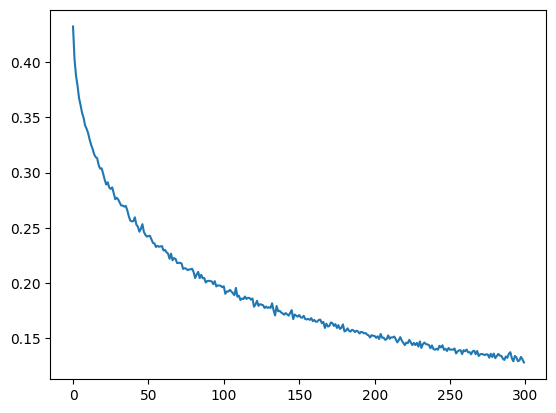

In [ ]:
ann_df = pd.DataFrame(ann.history.history)
ann_df['loss'].plot()

In [ ]:
y_pred_ann = ann.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
result(y_test,y_pred_ann,5)

R2_score : 0.7536640354689125
SSE : 0.20785434906209949
MAE : 0.32237443357876533
aic : -18943.52828835431
bic : -18913.777538916052


In [ ]:
ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 500)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,513,505 (5.77 MB)

 Trainable params: 504,501 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,009,004 (3.85 MB)

# LSTM - timesteps

Epoch 1/1000
355/355 [==============================] - 6s 9ms/step - loss: 0.4993 - mae: 0.5266
Epoch 2/1000
355/355 [==============================] - 3s 9ms/step - loss: 0.4478 - mae: 0.4937
Epoch 3/1000
355/355 [==============================] - 4s 12ms/step - loss: 0.4402 - mae: 0.4884
Epoch 4/1000
355/355 [==============================] - 3s 8ms/step - loss: 0.4353 - mae: 0.4847
Epoch 5/1000
355/355 [==============================] - 3s 8ms/step - loss: 0.4326 - mae: 0.4829
Epoch 6/1000
355/355 [==============================] - 3s 8ms/step - loss: 0.4313 - mae: 0.4817
Epoch 7/1000
355/355 [==============================] - 2s 7ms/step - loss: 0.4275 - mae: 0.4790
Epoch 8/1000
355/355 [==============================] - 2s 7ms/step - loss: 0.4243 - mae: 0.4768
Epoch 9/1000
355/355 [==============================] - 2s 7ms/step - loss: 0.4208 - mae: 0.4737
Epoch 10/1000
355/355 [==============================] - 2s 7ms/step - loss: 0.4163 - mae: 0.4708
Epoch 11/1000
355/355 [=====

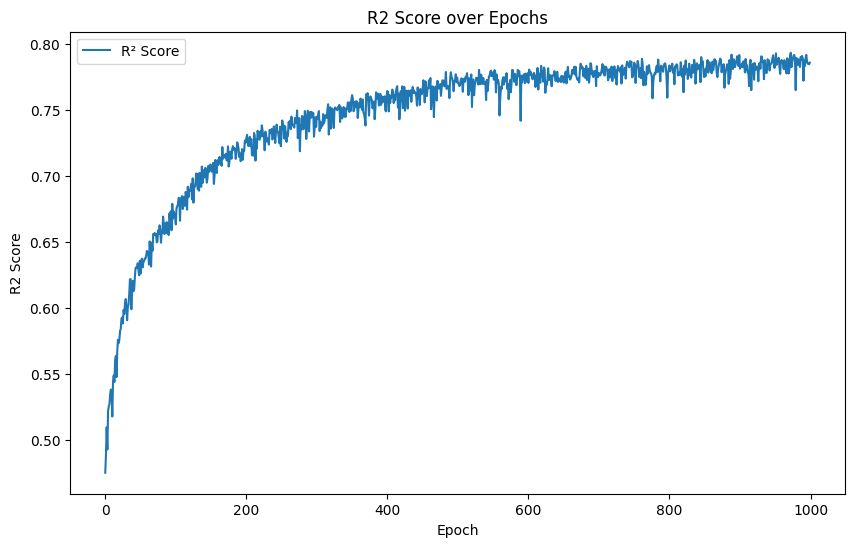

In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

X = data_c.loc[:, ['IN1', 'IN2', 'IN3', 'IN4', 'IN5']]
y = data_c.loc[:, 'Out1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

timesteps = 5
features = X_train.shape[1]

X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, features // timesteps))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, features // timesteps))

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

lstm_model = tf.keras.models.Sequential([
    layers.LSTM(units=50 ,activation='tanh', return_sequences=True, input_shape=(timesteps, features // timesteps)),
    layers.Dropout(0.05),
    #layers.LSTM(units=50 activation='tanh',return_sequences = True),
    #layers.Dropout(0.05),
    layers.LSTM(units=50,activation='tanh'),
    layers.Dropout(0.05),
    layers.Dense(units=1),
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))

lstm_model.fit(X_train, y_train, batch_size=32,callbacks = [r2_callback], epochs=1000)


In [ ]:
lstm_model_df = pd.DataFrame(lstm_model.history.history)
lstm_model_df['loss'].plot();

In [ ]:
y_pred_lstm = lstm_model.predict(X_test)
result(y_test,y_pred_lstm,5)

In [97]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 50)             10400     
                                                                 
 dropout_2 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# LSTM no-timesteps

In [ ]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
Xy = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out1']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential()

model.add(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.1))
model.add(LSTM(units = 256,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.1))
#output
model.add(tf.keras.layers.Dense(units=1))
#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

In [ ]:
y_pred_model = model.predict(X_test)
result(y_test,y_pred_model,5)

In [ ]:
model.summary()

## Bi-directional LSTM

In [ ]:
X = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = dataset_c.loc[:,'Out1']
Xy = dataset_c.loc[:,['IN1','IN2','IN3','IN4','IN5','Out1']]

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
Xy = sc.fit_transform(Xy)
X1 = Xy[:,:-1]
y1 = Xy[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.2,random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
import tensorflow as tf
from keras.layers import LSTM
model = tf.keras.models.Sequential([
    Bidirectional(LSTM(units = 256,activation='tanh', return_sequences=True, input_shape=(1,5))),
    tf.keras.layers.Dropout(0.05),
    Bidirectional(LSTM(units = 256,activation='tanh',return_sequences=True)),
    tf.keras.layers.Dropout(0.05),
    Bidirectional(LSTM(units = 256,activation='tanh')),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(units=1),
])


#compiling
model.compile(optimizer='adam',loss='mse')
loss = model.evaluate(X_test, y_test, verbose=2)
#training
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
model.fit(X_train,y_train,batch_size = 64,callbacks = [r2_callback],epochs = 1000)

In [ ]:
y_pred_bi = model.predict(X_test)
result(y_test,y_pred_bi,5)

# PCA

In [104]:
X = data_c.loc[:,['IN1','IN2','IN3','IN4','IN5']]
y = data_c.loc[:,'Out1']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

## KNN

In [106]:
from sklearn.neighbors import KNeighborsRegressor
knnp = KNeighborsRegressor(n_neighbors = 200)
knnp.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=200)

R2 Score: 0.5519684203438063
SSE: 1072.1267855615538
MAE: 0.44753688982219714
AIC: 5295.499558028988
BIC: 5313.350007691944


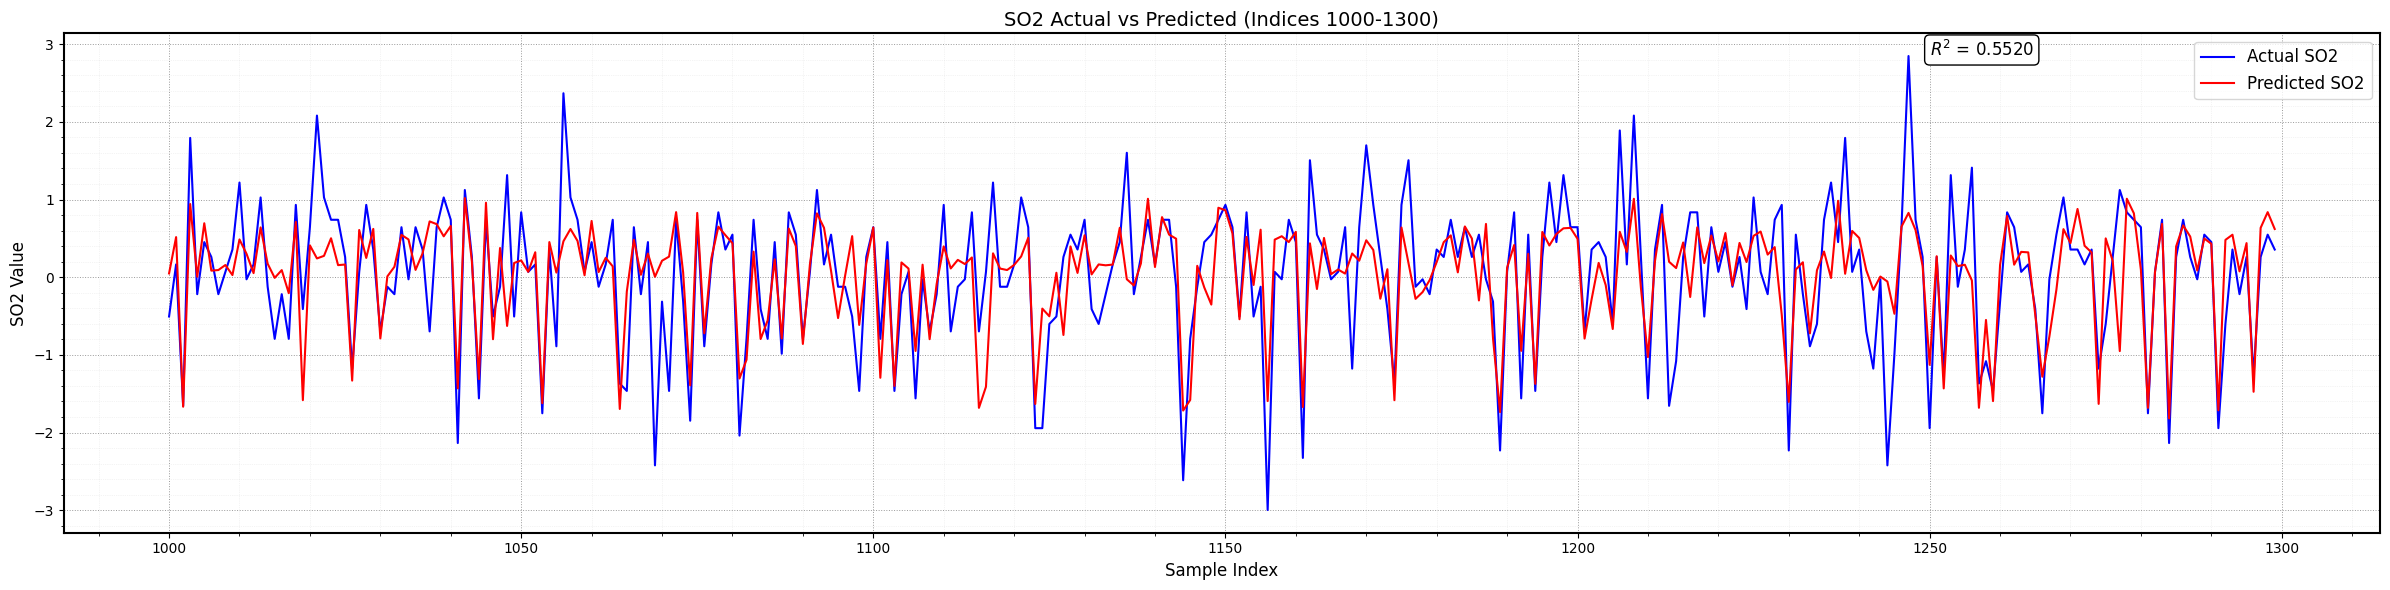

In [107]:
y_pred_knnp = knnp.predict(X_test)
result(y_test,y_pred_knnp,3)

In [ ]:
import matplotlib.pyplot as plt
# Assuming y_test is the actual data, and y_pred_lstm and y_pred_bilstm are the predictions from LSTM and BiLSTM models respectively.
np.save('y_test.npy', y_test)  # Save as NumPy file
y_test = np.load('y_test.npy')
y_pred_lstm = np.load('y_pred_lstm.npy')
y_pred_bi = np.load('y_pred_bi.npy')


# Plot the results
plt.figure(figsize=(20, 6))  # Adjusted size for better visualization
plt.plot(y_test, label='Actual Data', color='blue', linestyle='dashed', linewidth=2)
plt.plot(y_pred_lstm, label='LSTM Predictions', color='orange', linestyle='solid', linewidth=2)
plt.plot(y_pred_bi, label='Bi-LSTM Predictions', color='green', linestyle='solid', linewidth=2)

# Add labels, legend, and title
plt.xlabel('Time Steps', fontsize=16)
plt.ylabel('Values', fontsize=16)
#plt.title('Comparison of LSTM and Bi-LSTM Predictions Against Actual Data', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16, loc='lower right', frameon=True, shadow=True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add grid for better readability
plt.xlim(0, len(y_test) - 1)  # Adjust 0 and max index as needed
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("graph.png", dpi=300, bbox_inches='tight')  # High-resolution output
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming data_c is already defined
X = data_c.loc[:, ['IN1', 'IN2', 'IN3', 'IN4', 'IN5']]
y = data_c.loc[:, 'Out1']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping the input for LSTM
timesteps = 5
features = X_train.shape[1]

X_train = np.array(X_train).reshape((X_train.shape[0], timesteps, features // timesteps))
X_test = np.array(X_test).reshape((X_test.shape[0], timesteps, features // timesteps))

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Defining the Bi-LSTM model
bilstm_model = tf.keras.models.Sequential([
    layers.Bidirectional(layers.LSTM(units=50, activation='tanh', return_sequences=True), input_shape=(timesteps, features // timesteps)),
    layers.Dropout(0.05),
    layers.Bidirectional(layers.LSTM(units=50, activation='tanh', return_sequences=True)),
    layers.Dropout(0.05),
    layers.Bidirectional(layers.LSTM(units=50, activation='tanh')),
    layers.Dropout(0.05),
    layers.Dense(units=1),
])

# Compiling the model
bilstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Optional: Define a custom callback for R2 score
class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(R2ScoreCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.validation_data
        y_pred = self.model.predict(X_val, verbose=0)
        ss_res = np.sum((y_val - y_pred) ** 2)
        ss_tot = np.sum((y_val - np.mean(y_val)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        print(f'Epoch {epoch+1}: R2 Score = {r2_score:.4f}')

# Training the Bi-LSTM model
r2_callback = R2ScoreCallback(validation_data=(X_test, y_test))
bilstm_model.fit(X_train, y_train, batch_size=32, callbacks=[r2_callback], epochs=1000)

# Convert training history to a DataFrame
bilstm_model_df = pd.DataFrame(bilstm_model.history.history)

# Plotting the loss
bilstm_model_df['loss'].plot();

# Making predictions
y_pred_bilstm = bilstm_model.predict(X_test)


Epoch 1/1000
355/355 [==============================] - 15s 20ms/step - loss: 0.4799 - mae: 0.5137
Epoch 2/1000
355/355 [==============================] - 5s 15ms/step - loss: 0.4522 - mae: 0.4976
Epoch 3/1000
355/355 [==============================] - 5s 15ms/step - loss: 0.4459 - mae: 0.4922
Epoch 4/1000
355/355 [==============================] - 5s 15ms/step - loss: 0.4435 - mae: 0.4903
Epoch 5/1000
355/355 [==============================] - 5s 15ms/step - loss: 0.4368 - mae: 0.4876
Epoch 6/1000
355/355 [==============================] - 5s 15ms/step - loss: 0.4342 - mae: 0.4863
Epoch 7/1000
355/355 [==============================] - 5s 15ms/step - loss: 0.4320 - mae: 0.4841
Epoch 8/1000
355/355 [==============================] - 5s 14ms/step - loss: 0.4282 - mae: 0.4812
Epoch 9/1000
355/355 [==============================] - 5s 15ms/step - loss: 0.4227 - mae: 0.4768
Epoch 10/1000
355/355 [==============================] - 5s 14ms/step - loss: 0.4153 - mae: 0.4720
Epoch 11/1000
355/

In [ ]:

result(y_test,y_pred_bilstm,5)